In [24]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [26]:
len(x_train)

60000

In [27]:
len(x_test)

10000

In [28]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [29]:
x_train[0].shape

(28, 28)

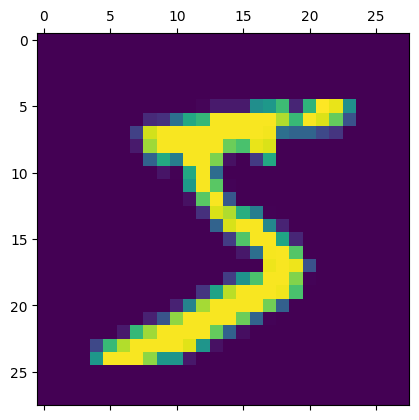

In [30]:
plt.matshow(x_train[0])

In deep learning at first we need to feed the training images to input datas as an one dimentional array. but the images are in 2D (28,28). so we'll reshape the images

In [31]:
x_train_flatten = x_train.reshape(len(x_train), 28*28)
x_test_flatten = x_test.reshape(len(x_test), 28*28)

In [32]:
x_train_flatten

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

Now we will build the model without any hidden layer. We will just connect all the input layers with the output layers of 10 classes

In [33]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

# tb_callback = keras.callbacks.TensorBoard(log_dir='logs/', histogram_freq=1)

model.compile(
    optimizer = 'SGD',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(x_train_flatten, y_train, epochs=5)

Epoch 1/5


C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8056 - loss: 455.1898
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8709 - loss: 250.8681
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8740 - loss: 254.8939
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8748 - loss: 246.4718
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8767 - loss: 237.7109


you can see higher the epoch is the higher the accuracy gets. 88% accuracy is quite good but it's not enough. we need to have more than 95% accuracy. for that we can scale the inputs. to scale it we will divide the values by 255 because all the images pixels are in range between 0 - 255. after scaling we'll get values from 0 to 1

In [34]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [35]:
x_train_scaled_flatten = x_train_scaled.reshape(len(x_train), 28*28)
x_test_scaled_flatten = x_test_scaled.reshape(len(x_test), 28*28)

In [36]:
x_train_scaled_flatten[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [37]:
model2 = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
model2.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model2.fit(x_train_scaled_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8054 - loss: 0.7351
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 980us/step - accuracy: 0.9131 - loss: 0.3090
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9194 - loss: 0.2834
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9244 - loss: 0.2750
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9262 - loss: 0.2640


In [38]:
model2.evaluate(x_test_scaled_flatten, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9162 - loss: 0.3036


[0.26916447281837463, 0.926800012588501]

In [39]:
y_predicted = model2.predict(x_test_scaled_flatten)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step


In [40]:
y_predicted[0]

array([2.8614765e-02, 3.1324760e-07, 6.8209328e-02, 9.3989515e-01,
       1.6764536e-03, 1.0440679e-01, 1.6330616e-06, 9.9965829e-01,
       1.0981122e-01, 6.8869585e-01], dtype=float32)

In [41]:
y_test[0]

7

In [42]:
np.argmax(y_predicted[0])

7

In [43]:
y_predicted_labels = [np.argmax(i) for i in y_predicted ]

In [44]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    1,    2,    0,    5,    5,    2,    3,    0],
       [   0, 1108,    3,    2,    0,    1,    4,    2,   15,    0],
       [   5,    7,  928,   11,    6,    4,   12,    8,   47,    4],
       [   4,    0,   21,  903,    0,   34,    2,    9,   29,    8],
       [   1,    1,    2,    1,  902,    0,   13,    4,   14,   44],
       [   9,    3,    2,   21,    6,  787,   15,    4,   38,    7],
       [   9,    3,    6,    1,    7,   12,  914,    2,    4,    0],
       [   1,    5,   25,    3,    6,    1,    0,  936,    5,   46],
       [   4,    6,    6,   14,    9,   21,    8,    5,  895,    6],
       [  10,    6,    1,    6,   21,    6,    0,   13,   13,  933]])>

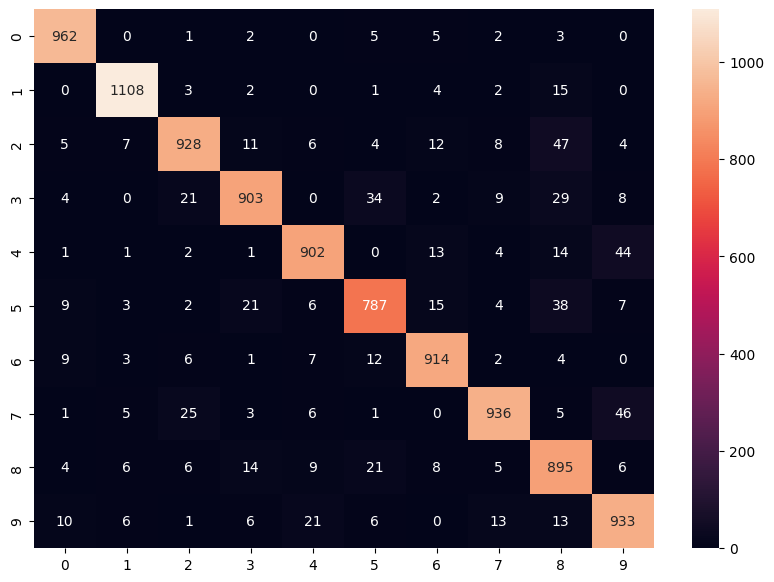

In [45]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot = True, fmt='d')
plt.show()


after scaling our accuracy gets to 92%. but we need more. from the heatmap we can see there are 54 wrong prediction in one case and many wrong predictions in other cases. that's why we will input a hidden layer. which will improve our accuracy

In [46]:
model3 = keras.Sequential([

    keras.layers.Dense(100, input_shape=(784,), activation='relu'), # we are adding another dense layer before connecting with output layers to increase the 
                                                                    # nurons. the number 100 is trial end error number you can play with this
    keras.layers.Dense(10, activation='sigmoid')                       
])
model3.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model3.fit(x_train_scaled_flatten, y_train, epochs=5)

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8770 - loss: 0.4440
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9621 - loss: 0.1315
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9727 - loss: 0.0894
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9811 - loss: 0.0639
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9849 - loss: 0.0496


So after adding a hidden layer we got 98.5% accuracy

In [47]:
model3.evaluate(x_test_scaled_flatten, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9700 - loss: 0.0911


[0.07612726092338562, 0.9757999777793884]

In [48]:
y_predicted2 =model3.predict(x_test_scaled_flatten)
y_predicted2

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[4.1628871e-02, 6.5614455e-05, 4.3376955e-01, ..., 9.9999070e-01,
        2.7619503e-02, 2.5026271e-01],
       [5.1118020e-04, 9.9852115e-01, 9.9999350e-01, ..., 3.3839942e-08,
        4.5434353e-01, 1.1302993e-07],
       [2.0218341e-04, 9.9643296e-01, 5.4267000e-02, ..., 1.9107360e-01,
        6.7436829e-02, 2.8768749e-04],
       ...,
       [1.6032195e-07, 3.4181085e-05, 1.1608487e-06, ..., 8.3368373e-01,
        9.1570765e-01, 9.5342743e-01],
       [1.6513356e-03, 7.3555676e-04, 1.7644392e-04, ..., 1.3542984e-04,
        9.3836218e-01, 7.8867590e-05],
       [1.6222686e-03, 1.0995728e-06, 1.2558058e-02, ..., 2.7535207e-06,
        6.3899131e-03, 4.2305030e-05]], dtype=float32)

In [49]:
y_predicted2_labels = [np.argmax(i) for i in y_predicted2]

In [50]:
cm2 = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted2_labels)
cm2

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 973,    0,    1,    1,    0,    1,    1,    0,    1,    2],
       [   0, 1123,    4,    3,    0,    1,    2,    0,    2,    0],
       [   3,    0, 1002,    9,    1,    0,    3,    4,   10,    0],
       [   0,    0,    5,  995,    0,    2,    0,    4,    2,    2],
       [   1,    1,    3,    1,  955,    0,    6,    0,    2,   13],
       [   2,    1,    0,   11,    1,  867,    4,    0,    5,    1],
       [   5,    2,    1,    1,    4,    5,  935,    1,    4,    0],
       [   1,    5,    9,    4,    1,    0,    0,  996,    3,    9],
       [   4,    0,    2,   17,    6,    4,    3,    3,  931,    4],
       [   3,    5,    0,    3,   12,    1,    0,    4,    0,  981]])>

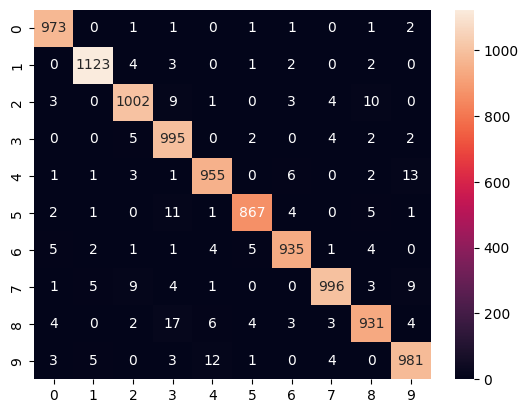

In [51]:
sns.heatmap(cm2, annot = True, fmt='d')
plt.show()

Even though there are flaws, it's better than ever. remeber life is not perfect. and no machine can give 100% accuracy

we can see we need to faltten the input imagess every time. it's tedious. that's why we'll use the flatten function of keras

In [58]:
model3 = keras.Sequential([

    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')                       
])
tb_callback = keras.callbacks.TensorBoard(log_dir='logs/', histogram_freq=1)
model3.compile(
    optimizer = 'SGD', # here you should use adam for better acurace
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model3.fit(x_train_scaled, y_train, epochs=5, callbacks = [tb_callback])

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7257 - loss: 1.0376
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9015 - loss: 0.3570
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9150 - loss: 0.3034
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9204 - loss: 0.2805
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9276 - loss: 0.2540


In [59]:
%reload_ext tensorboard
%tensorboard --logdir logs/train

Reusing TensorBoard on port 6007 (pid 2980), started 0:06:28 ago. (Use '!kill 2980' to kill it.)